# Airline Customer Satisfaction Level

## Importing Required Libraries

In [2]:
import pandas as pd # for Data Frame
import numpy as np # for Mathemetical Operations
import matplotlib.pyplot as plt # for Visulization
%matplotlib inline
import seaborn as sns # for Visulization
import warnings # for ignore warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier # for Decision Tree Algorytham
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score # for Accuracy
from sklearn.metrics import classification_report # for Accuracy
from sklearn.model_selection import train_test_split # for split data in to train and test
from sklearn.preprocessing import LabelEncoder, StandardScaler # for Encoding and Scaling data

## Part - 1: Data Exploration and Pre-processing

### 1) Load the given data

In [5]:
df = pd.read_csv('Airline_Customer_Satisfaction_Level.csv')

In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 2) Print all the column names

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### 3) describe the data

In [8]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


### 4) Drop the column 'Unnamed'

In [9]:
df = df.drop(["Unnamed: 0"], axis=1)

In [10]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### 5) Replace all the " " in the column with "_"

In [11]:
df.columns = df.columns.str.replace(' ', '_')

In [12]:
df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


### encoding to satisfaction column without using any encoding method

In [13]:
df['satisfaction'] = [1 if each=='satisfied' else 0 for each in df.satisfaction]

In [14]:
df[['satisfaction']].head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


In [15]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

### 6) Plot the numbers of satisfied customers and the numbers of unsatisfied customers

In [16]:
df['satisfaction'].value_counts()

0    5689
1    4311
Name: satisfaction, dtype: int64

<AxesSubplot:>

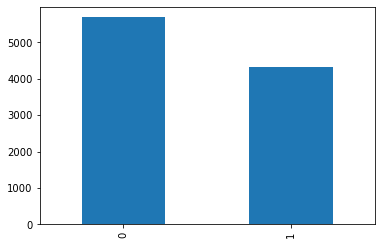

In [17]:
df['satisfaction'].value_counts().plot(kind='bar')

### 7) Plot the mean value of satisfaction of male and female customers

In [18]:
df[["Gender", "satisfaction"]].groupby(['Gender'], as_index=False).mean().sort_values(by='satisfaction', ascending=False)

,Gender,satisfaction
1,Male,0.438062
0,Female,0.424432


### 8) Plot the mean value of satisfaction customers with respect to Age

In [19]:
df[["Age", 'satisfaction']].groupby(['Age'], as_index=False).mean().sort_values(by='satisfaction', ascending=False)

,Age,satisfaction
71,79,0.666667
39,46,0.643192
34,41,0.632743
38,45,0.608466
66,73,0.600000
...,...,...
7,14,0.076923
0,7,0.071429
59,66,0.050000
69,76,0.000000


### 9) Find the mean Value of satisfaction customers with respect to Food_and_drink

In [20]:
df[["Food_and_drink", "satisfaction"]].groupby(['Food_and_drink'], as_index=False).mean().sort_values(by='satisfaction', ascending=False)

,Food_and_drink,satisfaction
0,0,0.625000
5,5,0.566176
4,4,0.515050
3,3,0.404990
2,2,0.362305
1,1,0.198142


### 10) Display a boxplot for Flight_Distance

<AxesSubplot:>

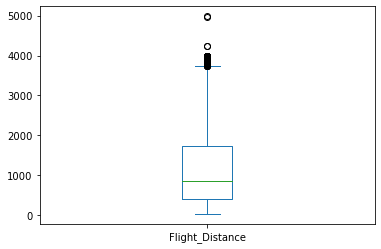

In [21]:
df['Flight_Distance'].plot(kind='box')

### 11) Display a boxplot for Checkin_service

<AxesSubplot:>

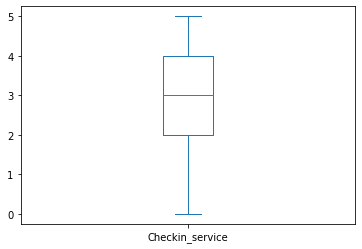

In [22]:
df['Checkin_service'].plot(kind='box')

### 12) Find all the Null values

In [23]:
df.isnull().sum()

id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

### 13) Drop all the na values

In [24]:
df = df.dropna()

In [25]:
df.isnull().sum()

id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

### 14) Find the unique values in Flight_Distance

In [26]:
df['Flight_Distance'].unique()

array([ 460,  235, 1142, ..., 3033, 1319, 1443], dtype=int64)

## Part - 2: Working with Model

### 1) Perform encoding in columns Gender, Customer_Type, Type_of_Travel and Class

In [27]:
enc = LabelEncoder()

In [28]:
df['Gender'] = enc.fit_transform(df['Gender'])
df['Customer_Type'] = enc.fit_transform(df['Customer_Type'])
df['Type_of_Travel'] = enc.fit_transform(df['Type_of_Travel'])
df['Class'] = enc.fit_transform(df['Class'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9974 non-null   int64  
 1   Gender                             9974 non-null   int32  
 2   Customer_Type                      9974 non-null   int32  
 3   Age                                9974 non-null   int64  
 4   Type_of_Travel                     9974 non-null   int32  
 5   Class                              9974 non-null   int32  
 6   Flight_Distance                    9974 non-null   int64  
 7   Inflight_wifi_service              9974 non-null   int64  
 8   Departure/Arrival_time_convenient  9974 non-null   int64  
 9   Ease_of_Online_booking             9974 non-null   int64  
 10  Gate_location                      9974 non-null   int64  
 11  Food_and_drink                     9974 non-null   int64

### 2) Drop the column id

In [30]:
df = df.drop('id', axis=1)
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### 3) Create the feature and target data

In [31]:
x = df.drop('satisfaction', axis=1)
y = df[['satisfaction']]

In [32]:
x.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1,0,13,1,2,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,0,0,26,0,0,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,0,0,25,0,0,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,1,0,61,0,0,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [33]:
x.shape

(9974, 22)

In [34]:
y.head()

,satisfaction
0,0
1,0
2,1
3,0
4,1


In [35]:
y.shape

(9974, 1)

### 4) Perform scaling on feature data

In [36]:
scaler = StandardScaler()

In [37]:
x_scale = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [38]:
x_scale.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,1.022101,-0.468152,-1.739013,1.507418,2.269235,-0.737519,0.201740,0.629103,0.175328,-1.534155,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,1.161719,1.311516,0.267269,0.071064
1,1.022101,2.136058,-0.945477,-0.663386,-0.947100,-0.962124,0.201740,-0.680029,0.175328,0.023662,...,-1.818316,-1.741829,-1.836318,1.260872,-0.520774,-1.801501,0.315212,-1.715981,-0.360223,-0.238149
2,-0.978377,-0.468152,-0.879349,-0.663386,-0.947100,-0.056715,-0.551311,-0.680029,-0.537562,-0.755246,...,1.197922,1.241813,0.492014,-0.264779,0.319439,0.562836,0.315212,1.311516,-0.386368,-0.392755
3,-0.978377,-0.468152,-0.945477,-0.663386,-0.947100,-0.635698,-0.551311,1.283668,1.601106,1.581480,...,-1.064257,-0.995918,-1.060207,1.260872,-0.520774,-1.801501,0.315212,-0.959107,-0.098768,-0.160845
4,1.022101,-0.468152,1.435132,-0.663386,-0.947100,-0.983087,0.201740,-0.025463,0.175328,0.023662,...,1.197922,-0.250008,-0.284097,0.498047,0.319439,-0.225277,-0.531294,-0.202233,-0.386368,-0.392755


### 5) Split the data in training and testing set

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.2,random_state=2)

In [40]:
x_train

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
3663,1.022101,-0.468152,-0.747093,1.507418,0.661068,-0.025770,-1.304362,-1.334595,-1.963340,-1.534155,...,-1.064257,-0.995918,-1.836318,-1.027604,-2.201199,0.562836,-1.377801,-0.959107,-0.386368,-0.392755
5085,-0.978377,-0.468152,-0.218069,1.507418,0.661068,-0.969112,-0.551311,0.629103,-0.537562,0.023662,...,-0.310197,-0.250008,-0.284097,-0.264779,0.319439,0.562836,0.315212,-0.202233,0.424142,-0.135078
2200,-0.978377,-0.468152,-0.680965,-0.663386,-0.947100,1.094262,-1.304362,1.283668,-1.250451,1.581480,...,-1.818316,-1.741829,-1.060207,-1.027604,-1.360987,0.562836,-0.531294,-1.715981,-0.307932,-0.392755
6343,-0.978377,-0.468152,0.707724,-0.663386,-0.947100,1.384751,-0.551311,-0.025463,-1.250451,0.023662,...,-0.310197,-0.995918,-1.060207,-0.264779,-1.360987,-1.013389,-1.377801,-0.202233,-0.386368,-0.392755
9308,1.022101,-0.468152,0.972236,-0.663386,0.661068,-0.807396,-0.551311,-1.334595,-1.250451,-1.534155,...,-1.064257,-0.995918,-1.060207,1.260872,-0.520774,0.562836,-0.531294,-0.959107,0.868615,0.586418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.022101,2.136058,-0.416453,-0.663386,-0.947100,-0.609743,-1.304362,-1.334595,-1.250451,-1.534155,...,-0.310197,-0.250008,-0.284097,-1.027604,0.319439,-0.225277,1.161719,-0.202233,0.659451,0.380277
2514,1.022101,2.136058,-0.151941,-0.663386,0.661068,-0.510917,0.954790,0.629103,0.888217,0.023662,...,1.197922,1.241813,0.492014,-1.027604,1.159652,0.562836,-2.224307,1.311516,-0.386368,-0.392755
6637,-0.978377,-0.468152,-0.284197,-0.663386,-0.947100,1.695206,0.201740,-0.025463,0.888217,0.023662,...,1.197922,1.241813,1.268125,1.260872,1.159652,-0.225277,1.161719,-0.202233,-0.360223,-0.392755
2575,-0.978377,-0.468152,-0.813221,1.507418,0.661068,-0.531880,-0.551311,-1.989161,-0.537562,-1.534155,...,-0.310197,-0.250008,-0.284097,1.260872,0.319439,1.350948,0.315212,-0.202233,-0.360223,-0.263916


In [41]:
x_train.shape

(7979, 22)

In [42]:
x_test.shape

(1995, 22)

In [43]:
y_train.shape

(7979, 1)

In [44]:
y_test.shape

(1995, 1)

### 6) Fit the decision tree model with various parameters

In [45]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=16, min_samples_leaf=1, min_samples_split=2, max_features="sqrt", random_state=2)

In [46]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=2)

In [50]:
train_score = round(model_dt.score(x_train, y_train)*100, 2)

print('Train Score is : ', train_score)

Train Score is :  98.04


In [51]:
test_score = round(model_dt.score(x_test, y_test)*100, 2)

print('Test Score is : ', test_score)

Test Score is :  92.63


In [52]:
y_pred = model_dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### 7) Create a function to display precision score, recall score, accuracy, classification report, confusion matrix and F1 score

In [53]:
def run_model(model_dt, x_train, y_train, x_test, y_test):
    model_dt.fit(x_train,y_train)
    y_pred = model_dt.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Pricison_score: ",precision_score(y_test, y_pred))
    print("Recall_score: ",recall_score(y_test, y_pred))
    print("Accuracy = {}".format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    print(confusion_matrix(y_test,y_pred))

In [54]:
run_model(model_dt, x_train, y_train, x_test, y_test)

Pricison_score:  0.9320388349514563
Recall_score:  0.8940628637951106
Accuracy = 0.9263157894736842
              precision    recall  f1-score   support

           0    0.92229   0.95070   0.93628      1136
           1    0.93204   0.89406   0.91266       859

    accuracy                        0.92632      1995
   macro avg    0.92716   0.92238   0.92447      1995
weighted avg    0.92649   0.92632   0.92611      1995

[[1080   56]
 [  91  768]]
